<a href="https://colab.research.google.com/github/felipesayegg/Estatistica_com_Python/blob/main/An%C3%A1lise_Descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
#importando a biblioteca pandas como pd, uma convenção comum usada para fácil acesso às suas funções
import pandas as pd

#importando a biblioteca numpy como np, padrão para realizar operações numéricas de alto desempenho
import numpy as np

#importando a biblioteca seaborn como sns, que torna fácil criar visualizações estatísticas atraentes
import seaborn as sns

import matplotlib.pyplot as plt # iblioteca matplotlib, uma das bibliotecas mais populares e poderosas para criação de gráficos em Python

# Agora você pode usar `pd` para manipulação de dados com pandas,
# `np` para operações numéricas com numpy,
# e `sns` para visualização de dados com seaborn.

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:

# Carrega o arquivo CSV em um DataFrame do pandas
dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [3]:
dados.head(10) # Visualizando os 10 prmieiros dados


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
5,11,1,34,8,12,790,1.637906
6,11,0,57,8,12,3150,1.570078
7,11,1,60,8,12,1700,1.608495
8,11,1,50,4,14,1800,1.780329
9,11,0,26,8,12,1150,1.793203


### 1º Definir os intevalos das classes em reais (R$)

### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

In [4]:
classes = [
    dados.Renda.min(),  # Inicia a primeira classe com o menor valor de renda no conjunto de dados
    2 * 788,            # Define o limite superior da primeira classe, 2 salários mínimos (SM), assumindo 788 como valor de 1 SM
    5 * 788,            # Define o limite superior da segunda classe, 5 SM
    15 * 788,           # Define o limite superior da terceira classe, 15 SM
    25 * 788,           # Define o limite superior da quarta classe, 25 SM
    dados.Renda.max()   # Finaliza a última classe com o maior valor de renda no conjunto de dados
]
classes

[0, 1576, 3940, 11820, 19700, 200000]

Explicação das Classes
Propósito: As classes definem os intervalos nos quais queremos agrupar as rendas para criar uma tabela de frequência. Cada classe representa um intervalo de renda, permitindo que a distribuição de rendas seja visualmente e estatisticamente analisada de acordo com limites pré-definidos.

### 2º Definir os labels das classes

In [5]:
labels = [
    'E - Até 2 SM (Até R$ 2.200)',         # Renda na faixa até 2 SM
    'D - De 2 a 5 SM (R$ 2.200 a R$ 5.500)', # Renda na faixa de 2 a 5 SM
    'C - De 5 a 15 SM (R$ 5.500 a R$ 16.500)', # Renda na faixa de 5 a 15 SM
    'B - De 15 a 25 SM (R$ 16.500 a R$ 27.500)', # Renda na faixa de 15 a 25 SM
    'A - Acima de 25 SM (Acima de R$ 27.500)'   # Renda acima de 25 SM
]

Explicação dos Labels
Propósito: Os labels são usados para dar um nome e descrição a cada classe de renda. Isso ajuda a facilitar a interpretação dos dados, tornando a análise mais intuitiva e compreensível.
Descrição Amigável: Cada label fornece uma descrição clara do intervalo de renda em termos de salários mínimos, além de fornecer o intervalo numérico correspondente, ajudando a identificar as faixas de renda que cada grupo representa.
Associação com Classes: Quando você usa estas classes em conjunto com os labels, cada valor de renda no seu conjunto de dados pode ser categorizado e rotulado para análise posterior, como construção de um gráfico de barras ou uma tabela de frequência.

### 3º Construir a coluna de frequências

In [6]:
# Calcula a frequência de renda categorizada usando a função pd.value_counts()
frequencia_renda = pd.value_counts(
    # Categoriza os dados de 'Renda' em intervalos definidos por 'bins' e rotula-os com 'labels'
    pd.cut(x = dados.Renda,   # Seleciona a coluna 'Renda' do DataFrame 'dados' para categorização
           bins = classes,    # Define os limites dos intervalos com base na lista 'classes'
           labels = labels,   # Aplica os rótulos definidos na lista 'labels' a cada intervalo
           include_lowest= True) # Inclui o limite inferior do primeiro intervalo (o menor valor)
    )
frequencia_renda

<ipython-input-6-98f6f6cc5ffc>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencia_renda = pd.value_counts(


,count
Renda,
E - Até 2 SM (Até R$ 2.200),49755
D - De 2 a 5 SM (R$ 2.200 a R$ 5.500),18602
C - De 5 a 15 SM (R$ 5.500 a R$ 16.500),7241
B - De 15 a 25 SM (R$ 16.500 a R$ 27.500),822
A - Acima de 25 SM (Acima de R$ 27.500),420


In [7]:
# Converter a Série em um DataFrame para adicionar mais informações
tabela_frequencia = pd.DataFrame(frequencia_renda).reset_index()

In [8]:
# Renomear as colunas para serem mais descritivas
tabela_frequencia.columns = ['Faixa de Renda', 'Frequência']
tabela_frequencia

,Faixa de Renda,Frequência
0,E - Até 2 SM (Até R$ 2.200),49755
1,D - De 2 a 5 SM (R$ 2.200 a R$ 5.500),18602
2,C - De 5 a 15 SM (R$ 5.500 a R$ 16.500),7241
3,B - De 15 a 25 SM (R$ 16.500 a R$ 27.500),822
4,A - Acima de 25 SM (Acima de R$ 27.500),420


### 4º Construir a coluna de percentuais

In [9]:
# Calcula a distribuição percentual da renda categorizada usando pd.value_counts() com normalização
percentual_renda = pd.value_counts(
    # Categoriza os dados de 'Renda' em intervalos definidos por 'bins' e rotula-os com 'labels'
    pd.cut(x = dados.Renda,   # Seleciona a coluna 'Renda' do DataFrame 'dados' para categorização
           bins = classes,    # Define os limites dos intervalos com base na lista 'classes'
           labels = labels,   # Aplica os rótulos definidos na lista 'labels' a cada intervalo
           include_lowest= True), # Inclui o limite inferior do primeiro intervalo (o menor valor)
    normalize=True  # Normaliza as contagens para que o resultado seja uma proporção em vez de um total bruto
) * 100  # Multiplica por 100 para converter a proporção em porcentagem

# Visualiza a série resultante que contém a porcentagem de cada faixa de renda
percentual_renda

<ipython-input-9-08465b6d962d>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percentual_renda = pd.value_counts(


,proportion
Renda,
E - Até 2 SM (Até R$ 2.200),64.751432
D - De 2 a 5 SM (R$ 2.200 a R$ 5.500),24.208745
C - De 5 a 15 SM (R$ 5.500 a R$ 16.500),9.423477
B - De 15 a 25 SM (R$ 16.500 a R$ 27.500),1.069755
A - Acima de 25 SM (Acima de R$ 27.500),0.546590


### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [10]:
# Cria um DataFrame chamado 'dis_freq_renda' a partir de duas Séries: 'frequencia_renda' e 'percentual_renda'
dis_freq_renda = pd.DataFrame({
    'Frequência': frequencia_renda,  # Coluna 'Frequência' contendo contagens de cada classe de renda
    'Percentual': percentual_renda   # Coluna 'Percentual' contendo o percentual correspondente a cada classe
})
# Renomeia a coluna de índice do DataFrame para, por exemplo, 'Faixa de Renda'
dis_freq_renda.rename_axis('Faixa de Renda', inplace=True)
# Ordena o DataFrame 'dis_freq_renda' pelos índices, que são as faixas de renda, em ordem ascendente
dis_freq_renda.sort_index(ascending=True, inplace=True)

# Exibe o DataFrame resultante, mostrando as colunas de frequência e percentual para cada faixa de renda
dis_freq_renda


,Frequência,Percentual
Faixa de Renda,,
E - Até 2 SM (Até R$ 2.200),49755,64.751432
D - De 2 a 5 SM (R$ 2.200 a R$ 5.500),18602,24.208745
C - De 5 a 15 SM (R$ 5.500 a R$ 16.500),7241,9.423477
B - De 15 a 25 SM (R$ 16.500 a R$ 27.500),822,1.069755
A - Acima de 25 SM (Acima de R$ 27.500),420,0.546590


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<Axes: xlabel='Faixa de Renda'>

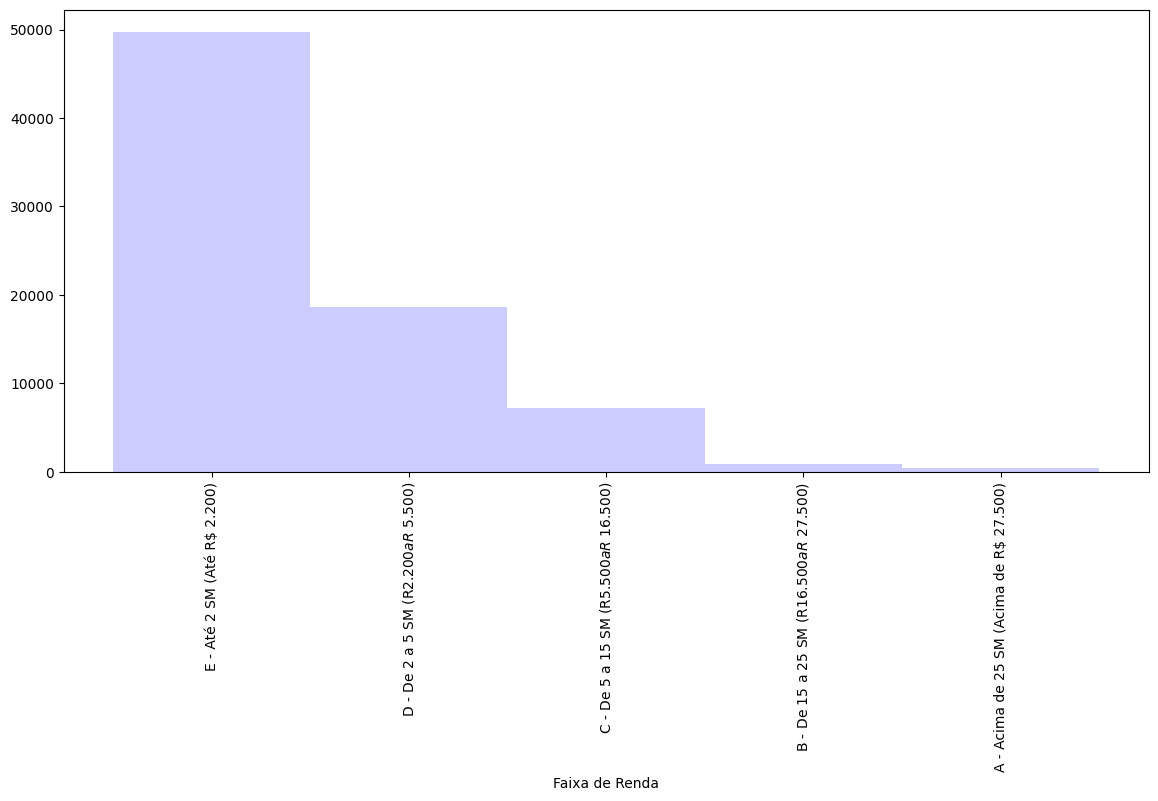

In [11]:
dis_freq_renda['Frequência'].plot.bar(width = 1, color = 'blue', alpha = 0.2, figsize=(14, 6)) # usou metodo da biblioteca pandas para fazer esse grafico de barras usando a função plot.bar

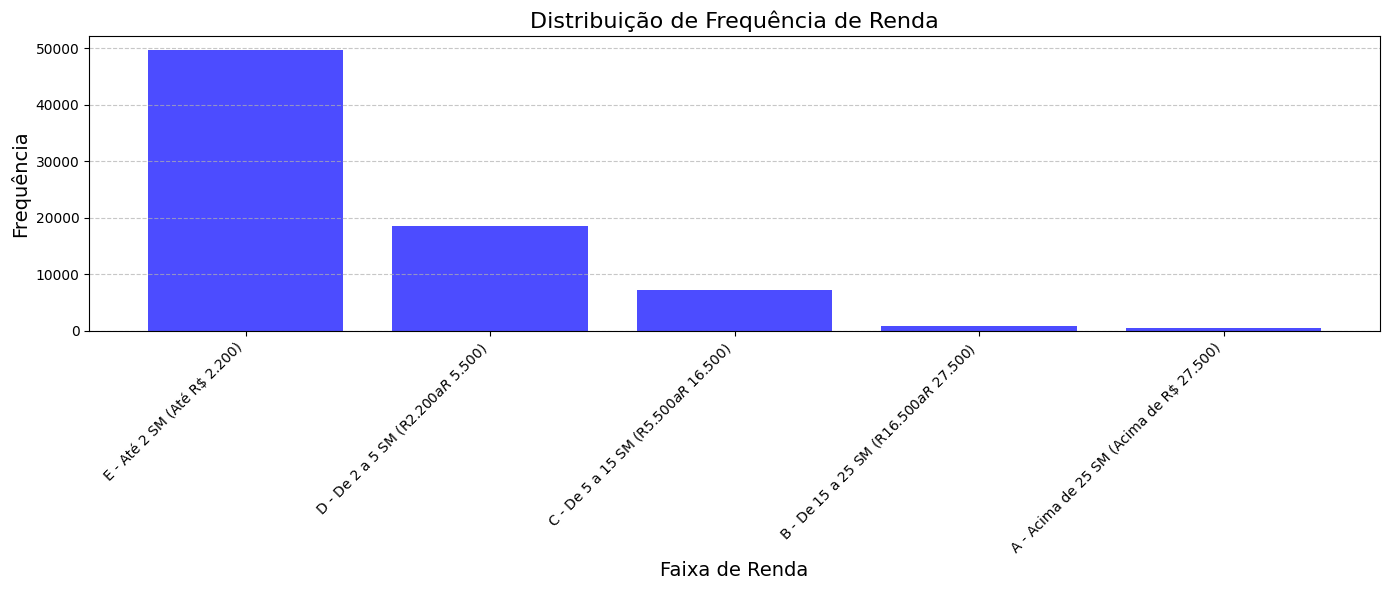

In [12]:
# Configura o tamanho e a resolução do gráfico
fig, ax = plt.subplots(figsize=(14, 6))

# Desenha o gráfico de barras
ax.bar(dis_freq_renda.index, dis_freq_renda['Frequência'], color='blue', width=0.8, alpha=0.7)

# Define o título do gráfico
ax.set_title('Distribuição de Frequência de Renda', fontsize=16)

# Define o rótulo do eixo y
ax.set_ylabel('Frequência', fontsize=14)

# Define o rótulo do eixo x
ax.set_xlabel('Faixa de Renda', fontsize=14)

# Ajusta os rótulos do eixo x para melhor apresentação
plt.xticks(rotation=45, ha='right')

# Adiciona uma linha de grade para melhorar a legibilidade
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Exibe o gráfico
plt.tight_layout()
plt.show()



> ### Conclusões



### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

<ipython-input-13-d217c07f27dd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Idade'])


<Axes: title={'center': 'Distribuição de Frequências - IDADE'}, xlabel='Anos', ylabel='probabilidade'>

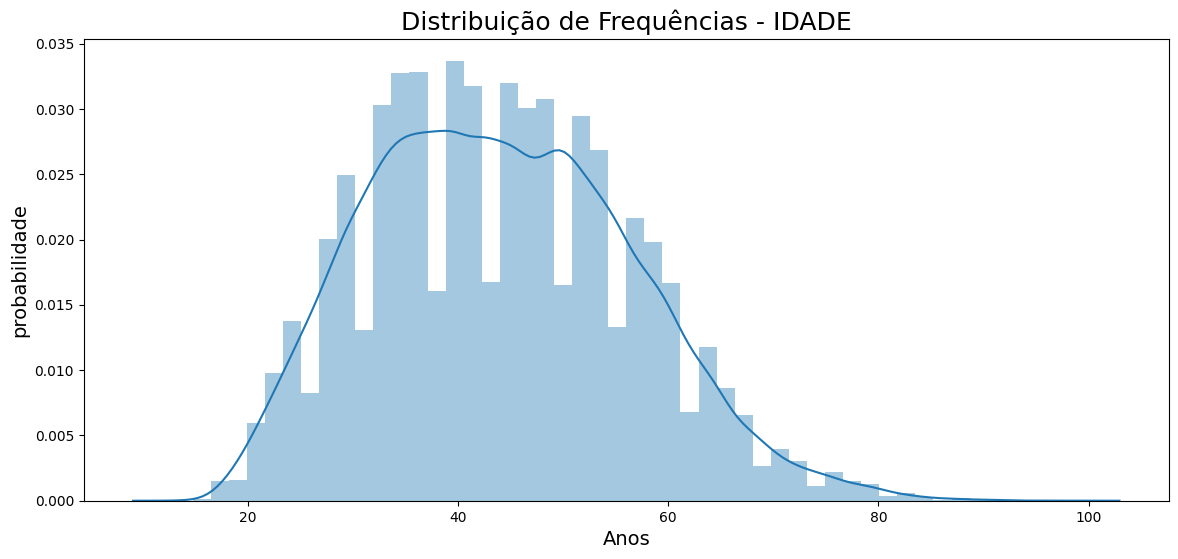

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cria um gráfico de distribuição (histograma e estimativa de densidade) para a variável 'Idade'
ax = sns.distplot(dados['Idade'])

# Ajusta o tamanho da figura para uma melhor visualização
ax.figure.set_size_inches(14, 6)  # Define o tamanho do gráfico em polegadas (largura x altura)

# Configura o título do gráfico para descrever o que está sendo exibido
ax.set_title('Distribuição de Frequências - IDADE', fontsize=18)  # Define o título do gráfico e o tamanho da fonte

# Configura o rótulo do eixo X, indicando que representa 'Anos'
ax.set_xlabel('Anos', fontsize=14)  # Define o rótulo do eixo X como 'Anos' e ajusta o tamanho da fonte

# Configura o rótulo do eixo Y, indicando que representa 'probabilidade'
ax.set_ylabel('probabilidade', fontsize=14)  # Define o rótulo do eixo Y como 'probabilidade' e ajusta o tamanho da fonte

# Retorna o objeto ax para permitir mais personalizações, se necessário
ax  # Exibe o objeto de eixos, útil para ajustes adicionais

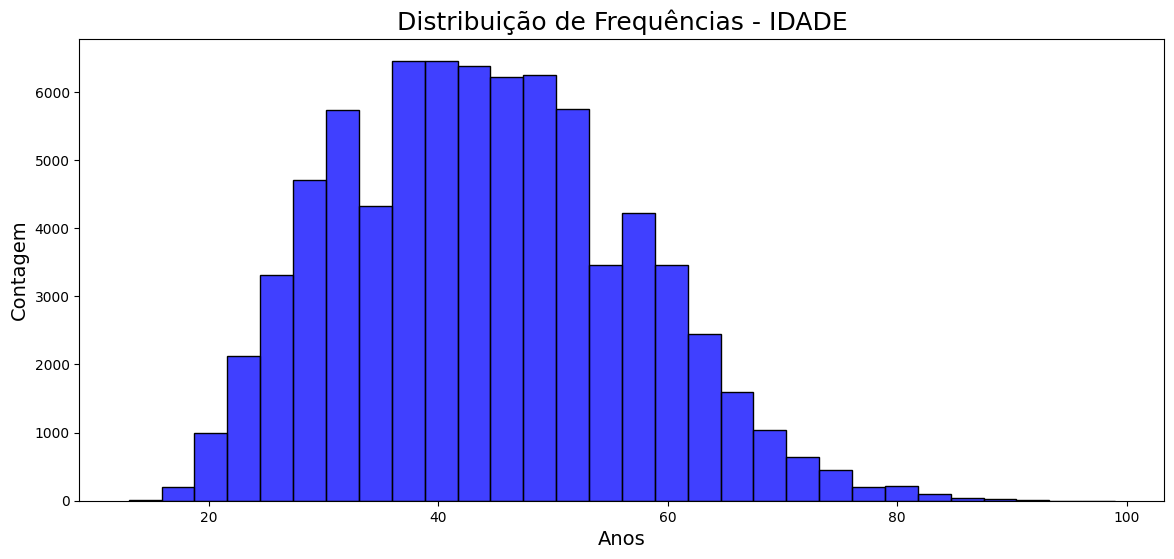

In [14]:

import seaborn as sns
import matplotlib.pyplot as plt

# Cria um histograma para a variável 'Idade', focando em contagens absolutas
ax = sns.histplot(
    dados['Idade'],  # Define os dados a serem plotados, neste caso, a coluna 'Idade' do DataFrame 'dados'
    bins=30,         # Define o número de bins (intervalos de classe) no histograma
    kde=False,       # Desativa a linha de densidade kernel (KDE), mostrando apenas o histograma
    color='blue'     # Define a cor das barras do histograma como azul
)

# Ajusta o tamanho da figura para melhor apresentar o gráfico
ax.figure.set_size_inches(14, 6)  # Define o tamanho do gráfico em polegadas (largura x altura)

# Configura o título do gráfico para indicar o que está sendo exibido
ax.set_title('Distribuição de Frequências - IDADE', fontsize=18)  # Define o título do gráfico e o tamanho da fonte

# Configura o rótulo do eixo X, indicando a variável representada (anos de idade)
ax.set_xlabel('Anos', fontsize=14)  # Define o rótulo do eixo X como 'Anos' e ajusta o tamanho da fonte

# Configura o rótulo do eixo Y, indicando que representa a contagem de ocorrências
ax.set_ylabel('Contagem', fontsize=14)  # Define o rótulo do eixo Y como 'Contagem' e ajusta o tamanho da fonte

# Exibe o gráfico usando matplotlib
plt.show()  # Renderiza e exibe o gráfico na tela

In [26]:
# Conta o número de ocorrências de 40 anos na coluna 'Idade'
contagem_40_anos = (dados['Idade'] == 40).sum()

print(f"Quantidade de pessoas com 40 anos: {contagem_40_anos}")

Quantidade de pessoas com 40 anos: 2263


<ipython-input-27-caf5a9667054>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Altura'])


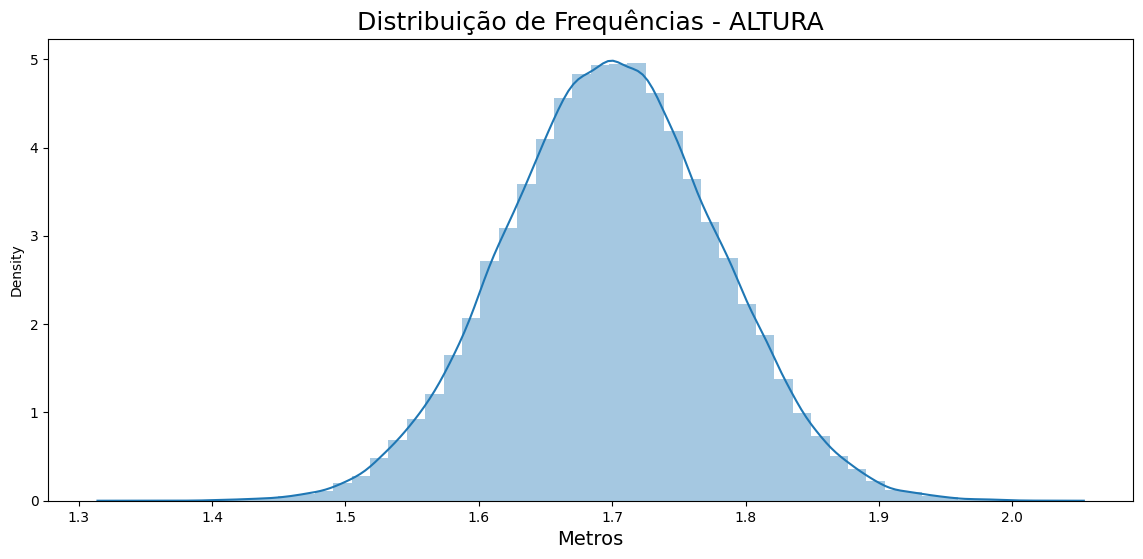

In [27]:

# Cria um gráfico de distribuição para a variável 'Altura'
ax = sns.distplot(dados['Altura'])

# Ajusta o tamanho da figura para melhor apresentação
ax.figure.set_size_inches(14, 6)  # Define o tamanho do gráfico em polegadas (largura x altura)

# Configura o título do gráfico
ax.set_title('Distribuição de Frequências - ALTURA', fontsize=18)  # Define o título e o tamanho da fonte

# Configura o rótulo do eixo X
ax.set_xlabel('Metros', fontsize=14)  # Define o rótulo do eixo X e ajusta o tamanho da fonte

# Exibe o gráfico usando matplotlib
plt.show()  # Renderiza e exibe o gráfico na tela

<ipython-input-28-457a5b3c9ec5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Renda'])


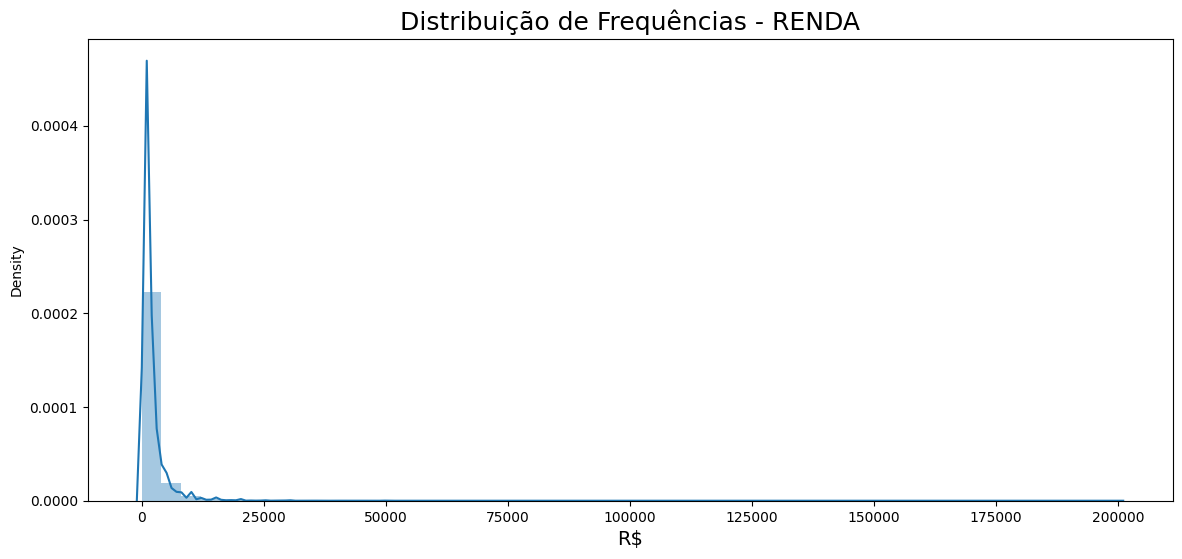

In [28]:


# Cria um gráfico de distribuição para a variável 'Renda'
ax = sns.distplot(dados['Renda'])

# Ajusta o tamanho da figura para melhor apresentação
ax.figure.set_size_inches(14, 6)  # Define o tamanho do gráfico para 14 polegadas de largura por 6 polegadas de altura

# Configura o título do gráfico para indicar o que está sendo exibido
ax.set_title('Distribuição de Frequências - RENDA', fontsize=18)  # Define o título do gráfico e o tamanho da fonte do título

# Configura o rótulo do eixo X para indicar que os valores são em reais (R$)
ax.set_xlabel('R$', fontsize=14)  # Define o rótulo do eixo X como 'R$', indicando que os valores são em reais, e ajusta o tamanho da fonte

# Exibe o gráfico usando matplotlib
plt.show()  # Renderiza e exibe o gráfico na tela

> ### Conclusões

Escreva suas conclusões aqui...

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

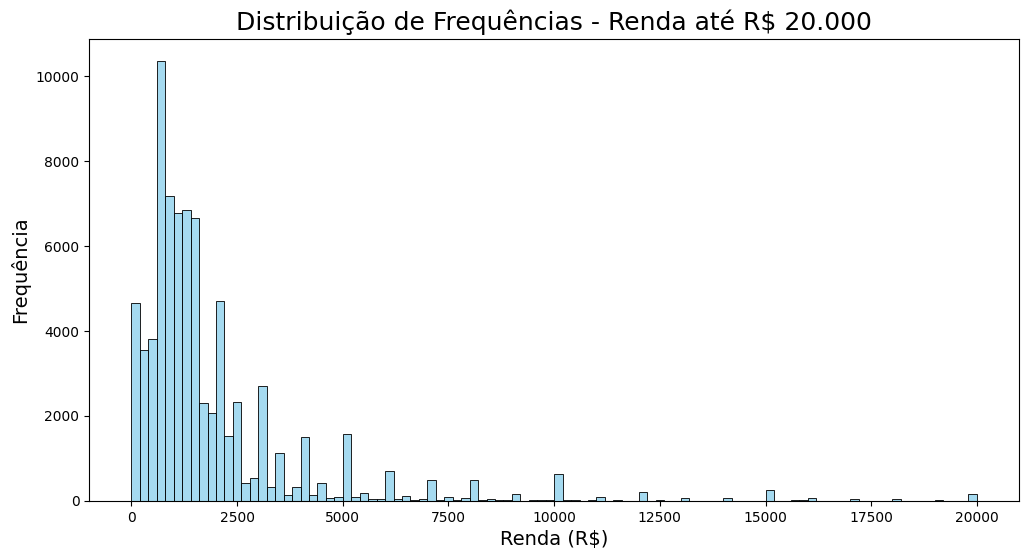

In [29]:


# Supondo que 'dados' é o seu DataFrame original
# Filtra o DataFrame para incluir apenas rendas até R$ 20.000
dados_filtrados = dados[dados['Renda'] <= 20000]  # Cria um subconjunto do DataFrame 'dados' onde a 'Renda' é menor ou igual a 20.000

# Cria o histograma usando os dados filtrados
plt.figure(figsize=(12, 6))  # Cria uma nova figura com tamanho 12x6 polegadas para o gráfico

ax_renda = sns.histplot(
    dados_filtrados['Renda'],  # Usando os dados filtrados da coluna 'Renda'
    bins=100,                  # Divide a renda em 100 intervalos (bins) para maior detalhe na distribuição
    kde=False,                 # Não inclui a curva de densidade (KDE), mostrando apenas o histograma
    color='skyblue',           # Define a cor das barras do histograma como azul claro
    edgecolor='black'          # Define a cor da borda das barras como preta para destaque
)

ax.set_ylim(0, 25000)  # Define manualmente os limites do eixo Y para até 25.000, ajustando a exibição do gráfico

# Configurações do gráfico
ax_renda.set_title('Distribuição de Frequências - Renda até R$ 20.000', fontsize=18)  # Define o título do gráfico com tamanho de fonte 18
ax_renda.set_xlabel('Renda (R$)', fontsize=14)  # Define o rótulo do eixo X como 'Renda (R$)' e ajusta o tamanho da fonte
ax_renda.set_ylabel('Frequência', fontsize=14)  # Define o rótulo do eixo Y como 'Frequência' e ajusta o tamanho da fonte

# Exibe o gráfico
plt.show()  # Renderiza e exibe o gráfico na tela

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [18]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [33]:


# Cria uma tabela cruzada de frequência entre as variáveis 'Sexo' e 'Cor'
frequencia = pd.crosstab(
    dados.Sexo,  # Agrupa os dados pela variável 'Sexo'
    dados.Cor    # Agrupa os dados pela variável 'Cor'
)

# Renomeia os índices da tabela cruzada com base em um mapeamento fornecido por 'sexo'
frequencia.rename(index=sexo, inplace=True)

# Renomeia as colunas da tabela cruzada com base em um mapeamento fornecido por 'cor'
frequencia.rename(columns=cor, inplace=True)

# Exibe a tabela de frequência resultante
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [34]:


# Cria uma tabela cruzada de percentuais entre as variáveis 'Sexo' e 'Cor'
percentual = pd.crosstab(
    dados.Sexo,  # Agrupa os dados pela variável 'Sexo'
    dados.Cor,   # Agrupa os dados pela variável 'Cor'
    normalize=True  # Normaliza os dados para obter proporções relativas
) * 100  # Multiplica por 100 para converter proporções em percentuais

# Renomeia os índices da tabela cruzada com base em um mapeamento fornecido por 'sexo'
percentual.rename(index=sexo, inplace=True)

# Renomeia as colunas da tabela cruzada com base em um mapeamento fornecido por 'cor'
percentual.rename(columns=cor, inplace=True)

# Exibe a tabela de percentual resultante
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [38]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [39]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [41]:
dados.Renda.mode()[0]

788

### Obtenha o desvio médio absoluto

In [45]:
# Calcula a média dos valores
media = dados['Renda'].mean()

# Calcula o desvio médio absoluto
mad = (dados['Renda'] - media).abs().mean()

print(f"Desvio Médio Absoluto: {mad}")

Desvio Médio Absoluto: 1526.4951371638058


### Obtenha a variância

In [42]:
dados.Renda.var()

11044906.00622118

### Obtenha o desvio-padrão

In [43]:
dados.Renda.std()

3323.3877303470294


### Desvio Médio Absoluto (MAD)

Definição: Média dos valores absolutos dos desvios em relação à média.
Simplicidade: É uma medida intuitiva de dispersão, mostrando o quanto, em média, cada valor do conjunto de dados se desvia da média.
Cálculo Manual:
Calcule a média dos dados.
Subtraia a média de cada valor e tome o valor absoluto.
Calcule a média desses valores absolutos.



### Variância

Definição: Média dos quadrados dos desvios em relação à média.
Sensibilidade: Dá mais peso a desvios maiores, fazendo com que a variância aumente quando há valores muito afastados da média.
Cálculo:
Calcule a média dos dados.
Subtraia a média de cada valor e eleve ao quadrado.
Calcule a média desses valores quadrados.



### Desvio Padrão

Definição: Raiz quadrada da variância.
Interpretação: Está na mesma unidade dos dados originais, facilitando a interpretação em relação à variância.
Cálculo:
Calcule a variância.
Tire a raiz quadrada da variância.



### Resumo das Diferenças

MAD é menos sensível a valores extremos comparado à variância e desvio padrão.
Variância considera o quadrado das diferenças, então valores extremos têm mais impacto.
Desvio Padrão é a medida mais comumente usada por estar na mesma unidade dos dados.

### Funções no Python (pandas)

MAD: Pode ser calculado manualmente se o método não estiver disponível.
Variância: dados['Renda'].var()
Desvio Padrão: dados['Renda'].std()

Essas medidas ajudam a entender a dispersão dos dados e são essenciais para análises estatísticas. Se precisar de mais informações, estou aqui para ajudar!


### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [47]:


# Cria uma tabela cruzada para calcular estatísticas de 'Renda' agrupadas por 'Cor' e 'Sexo'
renda_estatisticas_por_sexo_e_cor = pd.crosstab(
    dados.Cor,               # Agrupa pela variável 'Cor'
    dados.Sexo,              # Dentro de cada 'Cor', agrupa por 'Sexo'
    values=dados.Renda,      # Especifica que as operações de agregação serão realizadas na variável 'Renda'
    aggfunc={'mean', 'median', 'max'}  # Especifica as funções de agregação: média, mediana e máximo
)

# Renomeia os índices da tabela cruzada de acordo com o mapeamento fornecido por 'cor'
renda_estatisticas_por_sexo_e_cor.rename(index=cor, inplace=True)

# Renomeia as colunas da tabela cruzada de acordo com o mapeamento fornecido por 'sexo'
renda_estatisticas_por_sexo_e_cor.rename(columns=sexo, inplace=True)

# Exibe a tabela resultante
renda_estatisticas_por_sexo_e_cor

max                  mean                 median         
Sexo     Masculino Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                     
Indígena     10000   120000  1081.710938  2464.386139     797.5    788.0
Branca      200000   100000  2925.744435  2109.866750    1700.0   1200.0
Preta        50000    23000  1603.861687  1134.596400    1200.0    800.0
Amarela      50000    20000  4758.251064  3027.341880    2800.0   1500.0
Parda       100000    30000  1659.577425  1176.758516    1200.0    800.0

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [49]:
# Agrupa os dados por 'Cor' e 'Sexo'
renda_dispersao_por_sexo_e_cor = dados.groupby(['Cor', 'Sexo'])['Renda'].agg(
    mad=lambda x: (x - x.mean()).abs().mean(),  # Calcula manualmente o MAD
    var='var',  # Calcula a variância
    std='std'   # Calcula o desvio padrão
).round(2)  # Arredonda para duas casas decimais

# Renomeia os índices usando um mapeamento fornecido por 'cor'
renda_dispersao_por_sexo_e_cor.rename(index=cor, inplace=True)

# Renomeia os colunas usando um mapeamento fornecido por 'sexo'
renda_dispersao_por_sexo_e_cor.rename(columns=sexo, inplace=True)

# Exibe a tabela resultante
renda_dispersao_por_sexo_e_cor

mad           var       std
Cor      Sexo                                     
Indígena Indígena   798.91  1.449841e+06   1204.09
         1         3007.89  1.429818e+08  11957.50
Branca   Indígena  2261.01  2.257002e+07   4750.79
         1         1670.97  1.056909e+07   3251.01
Preta    Indígena   975.60  3.749294e+06   1936.31
         1          705.45  1.821960e+06   1349.80
Amarela  Indígena  3709.60  3.295707e+07   5740.82
         1         2549.15  1.392166e+07   3731.17
Parda    Indígena  1125.83  5.345747e+06   2312.09
         1          811.58  2.547960e+06   1596.23

In [50]:

# Calcula as estatísticas de dispersão para cada combinação de Cor e Sexo
renda_dispersao_por_sexo_e_cor = dados.groupby(['Cor', 'Sexo'])['Renda'].agg(
    mad=lambda x: (x - x.mean()).abs().mean(),
    var='var',
    std='std'
).round(2)

# Reorganiza a tabela para o formato desejado
renda_dispersao_por_sexo_e_cor = renda_dispersao_por_sexo_e_cor.unstack(level=1)

# Renomeia os índices e colunas, se necessário
# renda_dispersao_por_sexo_e_cor.rename(index=cor, columns=sexo, inplace=True)

# Exibe a tabela formatada
print(renda_dispersao_por_sexo_e_cor)

          mad                   var                    std          
Sexo        0        1            0             1        0         1
Cor                                                                 
0      798.91  3007.89   1449841.13  1.429818e+08  1204.09  11957.50
2     2261.01  1670.97  22570023.41  1.056909e+07  4750.79   3251.01
4      975.60   705.45   3749293.59  1.821960e+06  1936.31   1349.80
6     3709.60  2549.15  32957069.62  1.392166e+07  5740.82   3731.17
8     1125.83   811.58   5345747.15  2.547960e+06  2312.09   1596.23


> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<ipython-input-51-1d048669cc1a>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=12)    # Configurando o label de cada categoria do eixo Y


<Axes: title={'center': 'Box-plot da RENDA por SEXO e COR'}, xlabel='R$', ylabel='Cor'>

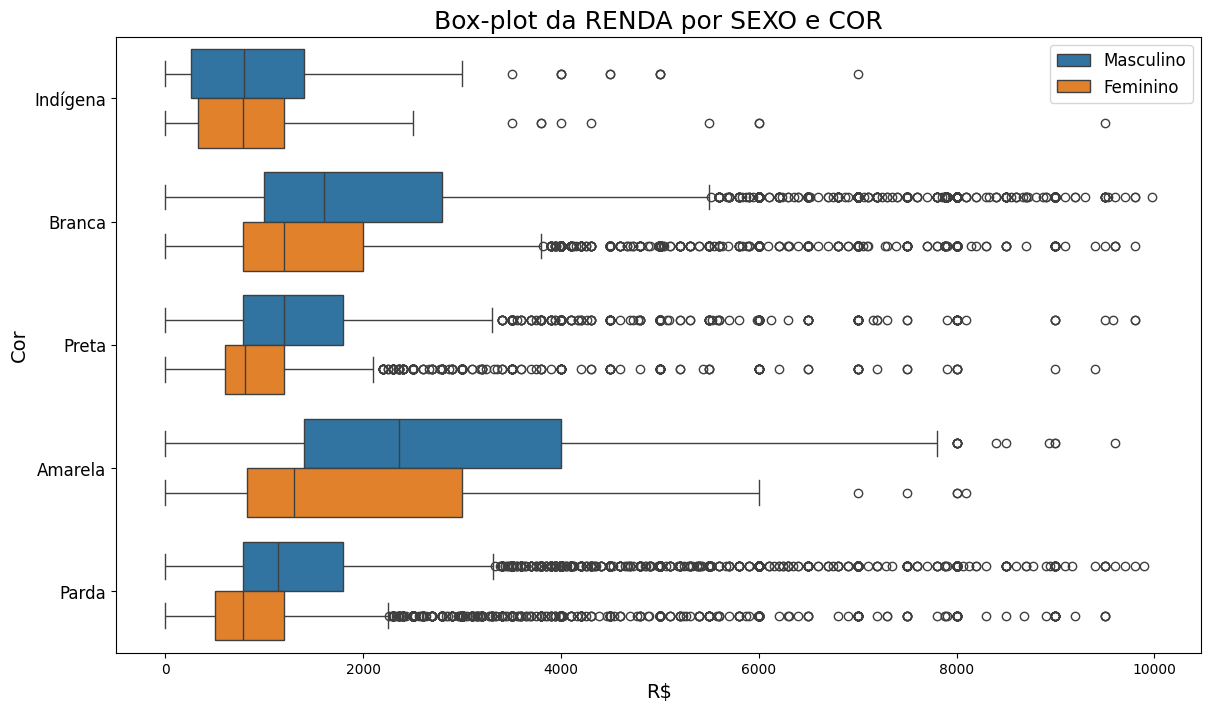

In [51]:
ax = sns.boxplot(x = 'Renda', y = 'Cor', hue = 'Sexo', data=dados.query('Renda < 10000'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por SEXO e COR', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Cor', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=12)    # Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

ax

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [19]:
from scipy import stats

percentual = stats.percentileofscore(dados.Renda, 788, kind = 'weak')
print("{0:.2f}%".format(percentual))

28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [20]:
valor = dados.Renda.quantile(.99)
print("R$ {0:.2f}".format(valor))

R$ 15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [21]:
import pandas as pd

# Calcula estatísticas da renda agrupadas por 'Anos de Estudo' e 'Sexo'
renda_estatisticas_por_sexo_e_estudo = pd.crosstab(
    dados['Anos de Estudo'],   # Agrupa os dados por 'Anos de Estudo', que será o índice das linhas
    dados.Sexo,                # Agrupa adicionalmente por 'Sexo', que será o índice das colunas
    aggfunc={'mean', 'median', 'max', 'std'},  # Funções de agregação aplicadas aos dados de 'Renda'
    values=dados.Renda         # Especifica que as funções de agregação serão aplicadas à coluna 'Renda'
).round(2)                     # Arredonda os resultados das funções de agregação para duas casas decimais

# Substitui os índices das linhas de acordo com o dicionário 'anos_de_estudo'
renda_estatisticas_por_sexo_e_estudo.rename(index=anos_de_estudo, inplace=True)

# Substitui os índices das colunas de acordo com o dicionário 'sexo'
renda_estatisticas_por_sexo_e_estudo.rename(columns=sexo, inplace=True)

# Exibe a tabela resultante com as estatísticas de renda por sexo e anos de estudo
renda_estatisticas_por_sexo_e_estudo

max               mean           \
Sexo                           Masculino Feminino Masculino Feminino   
Anos de Estudo                                                         
Sem instrução e menos de 1 ano     30000    10000    799.49   516.20   
1 ano                              30000     2000    895.63   492.77   
2 anos                             40000     4000    931.18   529.91   
3 anos                             80000     3500   1109.20   546.85   
4 anos                             50000    10000   1302.33   704.28   
5 anos                             35000     8000   1338.65   781.39   
6 anos                             25000     6000   1448.88   833.73   
7 anos                             40000     9000   1465.50   830.75   
8 anos                             30000    18000   1639.40   933.62   
9 anos                             60000    20000   1508.04   868.02   
10 anos                            45000     6000   1731.27   925.92   
11 anos                           200000   100000   2117.06  1286.79   
12 anos                            30000   120000   2470.33  1682.31   
13 anos                            25000    20000   3195.10  1911.73   
14 anos                            50000    20000   3706.62  2226.46   
15 anos ou mais                   200000   100000   6134.28  3899.51   
Não determinados                    7000     3000   1295.76   798.17   

                                  median                std           
Sexo                           Masculino Feminino Masculino Feminino  
Anos de Estudo                                                        
Sem instrução e menos de 1 ano     700.0    390.0   1023.90   639.31  
1 ano                              788.0    400.0   1331.95   425.29  
2 anos                             788.0    450.0   1435.17   498.23  
3 anos                             800.0    500.0   2143.80   424.12  
4 anos                            1000.0    788.0   1419.82   629.55  
5 anos                            1045.0    788.0   1484.65   635.78  
6 anos                            1200.0    788.0   1476.63   574.55  
7 anos                            1200.0    788.0   1419.71   602.04  
8 anos                            1300.0    800.0   1515.58   896.78  
9 anos                            1200.0    788.0   2137.66   973.22  
10 anos                           1218.0    800.0   2078.61   620.61  
11 anos                           1500.0   1000.0   2676.54  1819.04  
12 anos                           1800.0   1200.0   2268.08  4851.83  
13 anos                           2400.0   1300.0   2797.12  2053.79  
14 anos                           2500.0   1600.0   3987.21  2064.08  
15 anos ou mais                   4000.0   2800.0   7447.61  4212.77  
Não determinados                  1200.0    788.0    979.65   459.99

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<ipython-input-22-ff6c7a70b230>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=12)  # Altera os rótulos do eixo Y para usar nomes legíveis a partir de um dicionário


<Axes: title={'center': 'Box-plot da RENDA por SEXO e ANOS DE ESTUDO'}, xlabel='R$', ylabel='Anos de Estudo'>

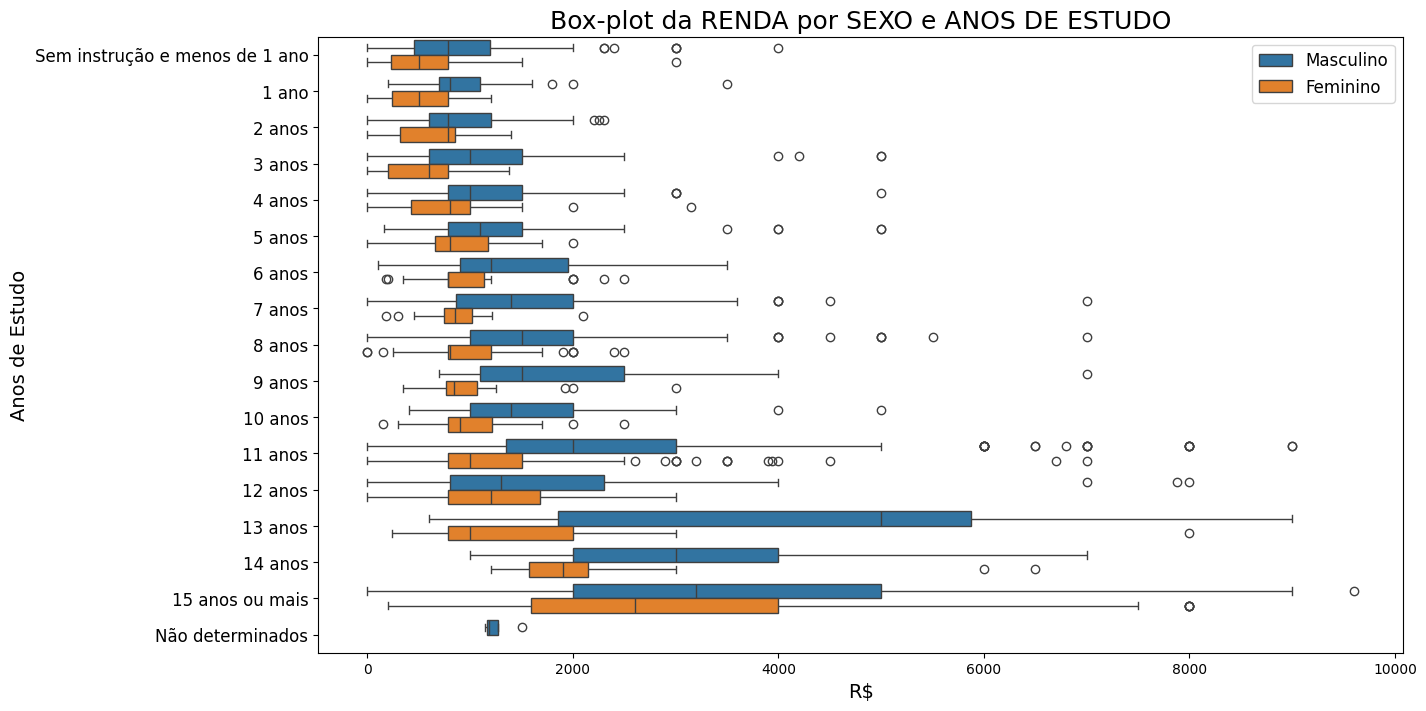

In [22]:
# Cria um boxplot para visualizar a distribuição da renda por anos de estudo e sexo
ax = sns.boxplot(
    x='Renda',                # Eixo X representa a variável 'Renda'
    y='Anos de Estudo',       # Eixo Y representa a variável 'Anos de Estudo'
    hue='Sexo',               # Usa a variável 'Sexo' para diferenciar as cores no gráfico (Masculino e Feminino)
    data=dados.query('Renda < 10000 and Idade == 50'),  # Filtra os dados para rendas abaixo de 10.000 e idade igual a 50
    orient='h'                # Define a orientação do boxplot como horizontal
)

# Ajusta o tamanho da figura para melhorar a visualização
ax.figure.set_size_inches(14, 8)    # Define o tamanho da figura do gráfico em polegadas

# Configura o título do gráfico
ax.set_title('Box-plot da RENDA por SEXO e ANOS DE ESTUDO', fontsize=18)  # Define o título e o tamanho da fonte

# Configura o rótulo do eixo X
ax.set_xlabel('R$', fontsize=14)    # Define o rótulo do eixo X e o tamanho da fonte

# Configura o rótulo do eixo Y
ax.set_ylabel('Anos de Estudo', fontsize=14)  # Define o rótulo do eixo Y e o tamanho da fonte

# Configura os rótulos das categorias no eixo Y usando um dicionário de mapeamento
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=12)  # Altera os rótulos do eixo Y para usar nomes legíveis a partir de um dicionário

# Configura a legenda do gráfico para diferenciar entre 'Masculino' e 'Feminino'
handles, _ = ax.get_legend_handles_labels()  # Obtém os elementos da legenda
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)  # Define os rótulos da legenda e o tamanho da fonte

ax

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [23]:
# Agrupa os dados por unidade federativa (UF) e calcula estatísticas de renda
renda_estatisticas_por_uf = dados.groupby(['UF']).agg({
    'Renda': ['mean', 'median', 'max', 'std']  # Calcula média, mediana, máximo e desvio padrão da renda para cada UF
})

# Renomeia os índices do DataFrame resultante usando um dicionário de mapeamento 'uf'
renda_estatisticas_por_uf.rename(index=uf, inplace=True)  # Substitui os códigos de UF por nomes legíveis dos estados
renda_estatisticas_por_uf

Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<ipython-input-24-e589ef17e7d9>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([key for key in uf.values()], fontsize=12)  # Usa um dicionário 'uf' para mapear códigos para nomes completos dos estados


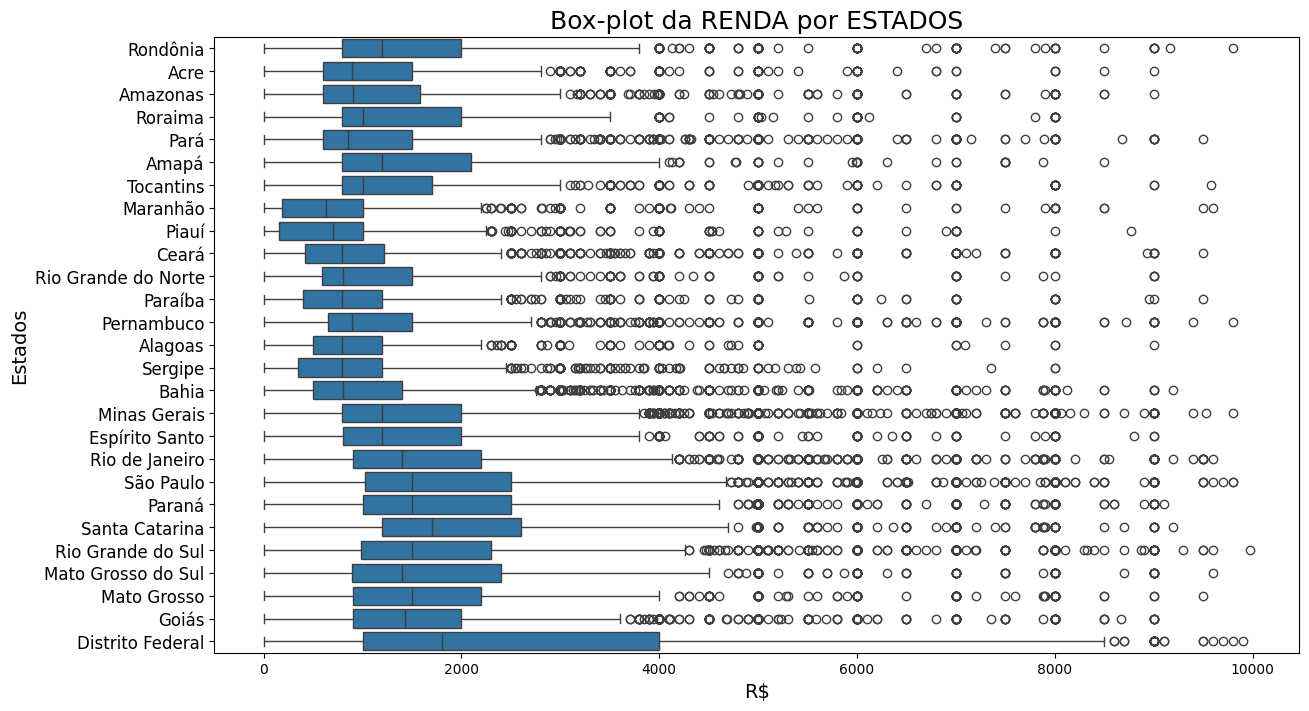

In [24]:
# Cria um boxplot para visualizar a distribuição da renda por estado (UF)
ax = sns.boxplot(
    x='Renda',               # Define a variável 'Renda' para o eixo X
    y='UF',                  # Define a variável 'UF' (Unidade Federativa) para o eixo Y
    data=dados.query('Renda < 10000'),  # Filtra os dados para incluir apenas rendas inferiores a 10.000
    orient='h'               # Define a orientação do boxplot como horizontal
)

# Ajusta o tamanho da figura para uma melhor visualização, definindo largura e altura em polegadas
ax.figure.set_size_inches(14, 8)    # Define o tamanho do gráfico em polegadas (largura x altura)

# Configura o título do gráfico para descrever o que está sendo exibido
ax.set_title('Box-plot da RENDA por ESTADOS', fontsize=18)  # Define o título do gráfico e o tamanho da fonte

# Configura o rótulo do eixo X, indicando que os valores são em reais
ax.set_xlabel('R$', fontsize=14)    # Define o rótulo do eixo X e o tamanho da fonte, indicando valores monetários

# Configura o rótulo do eixo Y, especificando que representa os estados
ax.set_ylabel('Estados', fontsize=14)  # Define o rótulo do eixo Y como 'Estados' e ajusta o tamanho da fonte

# Modifica os rótulos do eixo Y para mostrar nomes legíveis dos estados
ax.set_yticklabels([key for key in uf.values()], fontsize=12)  # Usa um dicionário 'uf' para mapear códigos para nomes completos dos estados

# Exibe o gráfico configurado
plt.show()  # Renderiza e exibe o gráfico, tornando visíveis todas as configurações feitas

> ### Conclusões

Escreva suas conclusões aqui...